# Exercise 02
# Camilo Torres Ovalle
# Wilfredo David Vega Buelvas

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [167]:
income.keys()

Index([u'Age', u'Workclass', u'fnlwgt', u'Education', u'Education-Num',
       u'Martial Status', u'Occupation', u'Relationship', u'Race', u'Sex',
       u'Capital Gain', u'Capital Loss', u'Hours per week', u'Country',
       u'Income'],
      dtype='object')

In [168]:
income.keys()

Index([u'Age', u'Workclass', u'fnlwgt', u'Education', u'Education-Num',
       u'Martial Status', u'Occupation', u'Relationship', u'Race', u'Sex',
       u'Capital Gain', u'Capital Loss', u'Hours per week', u'Country',
       u'Income'],
      dtype='object')

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

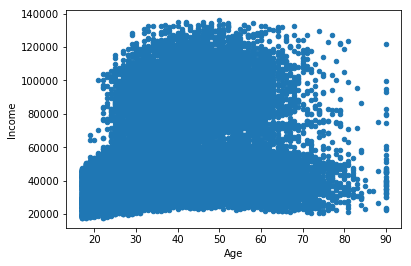

In [169]:
income.plot(x='Age', y='Income', kind='scatter')

In [170]:
# import
from sklearn.linear_model import LinearRegression

In [171]:
# Initialize
rl = LinearRegression(fit_intercept=True)

In [5]:
y = income['Income'].values.reshape(-1,1)
X = income['Age'].values.reshape(-1,1)


In [173]:
X.shape

(32561L, 1L)

In [174]:
# Fit - es un modelo supervisado
rl.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [175]:
rl.coef_

array([[ 542.16765707]])

# Respuesta

**1**. El gráfico permite concluir que no hay relación entre la edad y el ingreso.

**2**. Un incremento en 1% en la edad representa un incremento en el ingreso en en US$542.17.
 

# Exercise 2.2
Evaluate the model using the MSE

In [1]:
# Importamos la librería para sacar el MSE
from sklearn import metrics
# También importamos de sklearn la función para realizar la partición de los datos y correr un modelo
# con set de train y evaluarlo con el test
from sklearn.model_selection import train_test_split

In [6]:
#Realizamos la partición
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [ ]:
#Corremos el modelo
rl.fit(X_train, y_train)

In [179]:
# Evaluamos el modelo
rl.score(X_test, y_test)

0.081597958344303723

In [180]:
#Realizamos la predicción
y_pred = rl.predict(income[['Age']])

In [181]:
#Sacamos el MSE
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

('MSE:', 593789651.25274336)



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [182]:
# Se crea al modelo usando OLS
beta = np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T, y))

In [183]:
beta

array([[ 1291.82348999]])

In [184]:
#se crea la variable de Age2
income['Age2'] = income['Age'] ** 2
income

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36347.0,1369
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,24362.0,2401
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,108554.0,2704
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,88681.0,961
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,108863.0,1764


In [185]:
#Seleccionamos las variables
y = income['Income'].values.reshape(-1,1)
XX = income[['Age', 'Age2']] # se puede utilizar doble corchete para sacar más variables

print(XX)

       Age  Age2
0       39  1521
1       50  2500
2       38  1444
3       53  2809
4       28   784
5       37  1369
6       49  2401
7       52  2704
8       31   961
9       42  1764
10      37  1369
11      30   900
12      23   529
13      32  1024
14      40  1600
15      34  1156
16      25   625
17      32  1024
18      38  1444
19      43  1849
20      40  1600
21      54  2916
22      35  1225
23      43  1849
24      59  3481
25      56  3136
26      19   361
27      54  2916
28      39  1521
29      49  2401
...    ...   ...
32531   30   900
32532   34  1156
32533   54  2916
32534   37  1369
32535   22   484
32536   34  1156
32537   30   900
32538   38  1444
32539   71  5041
32540   45  2025
32541   41  1681
32542   72  5184
32543   45  2025
32544   31   961
32545   39  1521
32546   37  1369
32547   43  1849
32548   65  4225
32549   43  1849
32550   43  1849
32551   32  1024
32552   43  1849
32553   32  1024
32554   53  2809
32555   22   484
32556   27   729
32557   40  16

In [186]:
#Comprobamos el tamaño de las dos matrices
y.shape
#(32561L, 1L)
XX.shape
#(32561, 2)

(32561, 2)

In [187]:
# Initialize
rl2 = LinearRegression(fit_intercept=True)

In [188]:
# corremos el segundo modelo
rl2.fit(XX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
rl2.coef_

array([[ 3131.77014151,   -30.54341041]])

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [190]:
X_X = income[['Age', 'Age2', 'Education-Num', 'Hours per week']]

In [191]:
#Realizamos la partición
X_Xtrain, X_Xtest, y_y_train, y_y_test=train_test_split(X_X, y)

In [192]:
# Initialize
rl3 = LinearRegression(fit_intercept=True)

In [193]:
rl3.fit(X_X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
# Evaluamos el modelo
rl3.score(X_Xtest, y_y_test)

0.30824888282707641

In [195]:
# el modelo  mejora el Score con respecto al modelo inicial

# Resultados


Al comparar el Score de este modelo **0.3247** con respecto al Score del modelo anterior, vemos que en este caso las nuevas variables que se incluyeron, mejoran la predicción

# Exercise 2.5|


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [196]:
#Cargamos la librería
from sklearn.linear_model import LinearRegression
log = LinearRegression()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [197]:
#se crea una nueva variable a predecir
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [198]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 17 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Income            32561 non-null float64
Age2              32561 non-null int64
isUS              32561 non-null float64
dtypes: float64(2), int64(7), object(8)
memory usage: 5.7+ MB


In [199]:
del income ['Country']

In [200]:
income1 = pd.get_dummies(income)

In [201]:
income1.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Age2,isUS,Workclass_Federal-gov,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,39,77516,13,2174,0,40,51806.0,1521,1.0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,68719.0,2500,1.0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,51255.0,1444,1.0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,47398.0,2809,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,30493.0,784,0.0,0,...,0,0,1,0,0,1,0,0,1,0


In [202]:
#se crea una nueva variable binaria de Sexo
income['sex'] = (income['Sex'] == 'Male')*1.0
income['sex'].value_counts()

1.0    21790
0.0    10771
Name: sex, dtype: int64

In [209]:
#se seleccionan las variables que se usaran como predictores en la Logit
XX = income[['Age', 'Age2', 'Education-Num', 'Hours per week','sex']]

In [210]:
income1.head(10)

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Age2,isUS,Workclass_Federal-gov,...,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Female,Sex_Male
0,39,77516,13,2174,0,40,51806.0,1521,1.0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,68719.0,2500,1.0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,51255.0,1444,1.0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,47398.0,2809,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,30493.0,784,0.0,0,...,0,0,1,0,0,1,0,0,1,0
5,37,284582,14,0,0,40,36347.0,1369,1.0,0,...,0,0,1,0,0,0,0,1,1,0
6,49,160187,5,0,0,16,24362.0,2401,0.0,0,...,0,0,0,0,0,1,0,0,1,0
7,52,209642,9,0,0,45,108554.0,2704,1.0,0,...,0,0,0,0,0,0,0,1,0,1
8,31,45781,14,14084,0,50,88681.0,961,1.0,0,...,0,0,0,0,0,0,0,1,1,0
9,42,159449,13,5178,0,40,108863.0,1764,1.0,0,...,0,0,0,0,0,0,0,1,0,1


In [206]:
Y = income['isUS'].values.reshape(-1,1)

In [211]:
log.fit(XX,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [212]:
print log.score(XX, Y)

0.0119823048379
